In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import os
import tensorflow_probability.substrates.jax as tfp

tfd = tfp.distributions
from LaplaceApprox import LaplaceApproximation

*Creating the dataset*

In [2]:
data_dist = tfd.Bernoulli(probs=0.7)
data = data_dist.sample(sample_shape=(100,), seed=jax.random.PRNGKey(3))
prior_theta = [3.0, 5.0]
data

DeviceArray([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
             0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
             0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
             1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
             1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0],            dtype=int32)

## *Normal Laplace Approximation*

*Defining the likelihood function*

In [3]:
def likelihood_fn(theta, data):
    return tfd.Bernoulli(probs=theta).log_prob(data).sum()

In [4]:
la = LaplaceApproximation(
    prior=tfd.Beta(prior_theta[0], prior_theta[1]),
    bijector=tfp.bijectors.Identity(),                  ## Using identity bijector for normal laplace approximation
    likelihood=likelihood_fn,
)

In [5]:
appx_post = la.approx_posterior(data)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:13<00:00, 15.05it/s]


In [6]:
la.theta_map        ## MAP estimate

DeviceArray([0.60377455], dtype=float32)

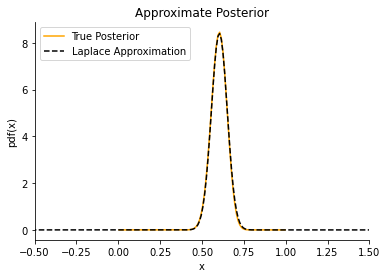

<Figure size 432x288 with 0 Axes>

In [7]:
alpha = prior_theta[0] + data.sum()
beta = prior_theta[1] + len(data) - data.sum()
true_posterior = tfd.Beta(alpha, beta)      ## True posterior

fig = la.plot_approx_posterior(true_posterior=true_posterior)       ## Plot the true posterior and the approx posterior

plt.xlim(-0.5,1.5)
plt.figure()
plt.savefig("plots/la_coin_toss.png")

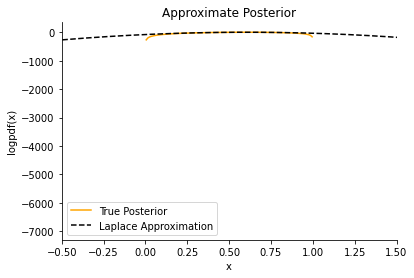

In [8]:
fig = la.plot_log_approx_posterior(true_posterior=true_posterior)    ## Plot the true posterior and the approx posterior in log scale

os.makedirs("plots", exist_ok=True)
plt.xlim(-0.5,1.5)
plt.savefig("plots/log_la_coin_toss.png")

## *Laplace Approximation using Change of Variable*

In [9]:
la_cov = LaplaceApproximation(
    prior=tfd.Beta(prior_theta[0], prior_theta[1]),
    bijector=tfp.bijectors.Sigmoid(),           ## Using sigmoid bijector for change of variable laplace approximation
    likelihood=likelihood_fn,
)

In [10]:
appx_post = la_cov.approx_posterior(data)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 83.41it/s]


In [11]:
la_cov.map(data)        ## MAP estimate

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 82.09it/s]


DeviceArray([0.41318712], dtype=float32)

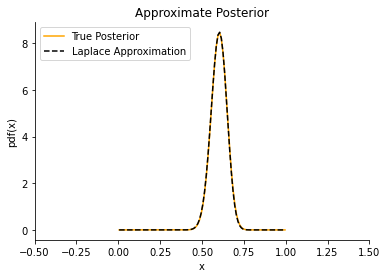

<Figure size 432x288 with 0 Axes>

In [12]:
alpha = prior_theta[0] + data.sum()
beta = prior_theta[1] + len(data) - data.sum()
true_posterior = tfd.Beta(alpha, beta)

fig_cov = la_cov.plot_approx_posterior(true_posterior=true_posterior)

plt.xlim(-0.5,1.5)
plt.figure()
plt.savefig("plots/la_cov_coin_toss.png")

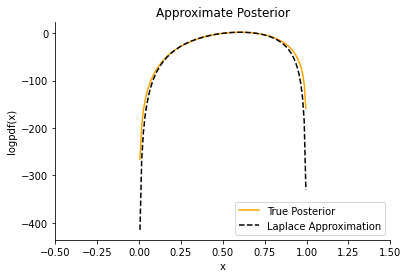

In [13]:
fig = la_cov.plot_log_approx_posterior(true_posterior=true_posterior)

os.makedirs("plots", exist_ok=True)
plt.xlim(-0.5,1.5)
plt.savefig("plots/log_la_cov_coin_toss.png")